I need to answer the question: What categories or groups here had high engagement (weekly logins) levels? Using information from a CSV.

### Short answer

Slack Integration and Had Free Trail categories marked Yes had high engagement levels.

### Approach

I opened the csv in an Excel file to quickly visualize all the data and type of variables. I made a dynamic table and ordered the data by Weekly Logins to see if I could get a clue on a category or group related to the engagement. Almost all fields (columns) were categorycal data, with the exception of Weekly Logins and Sales Closes to Touch.

Some of them where just Yes or No fields, but other had a varying number of categories.

I started thinking that maybe the Yes or No fields could be made binomial and then just check correlation with Weekly Logins, but I was still missing a solution for the rest of the fields.

I did some research to find how to relate a continuous variable with categorical variables, and I found that a lot of python libraries had algorithms for that, nameley statistic anlysis like ANOVA.

So I decided to explore these libraries and make the analysis with python.

### Analysis

In [1]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [4]:
df = pd.read_csv('C://Users/Luis/Downloads/weekly_logins.csv')

First, I checked how the data looks now that it is imported

In [5]:
df.head()

,User Name,Slack Integration,Most Used Page,Had Free Trial,User MRR,Weekly Logins,Company Name,Industry,Company Size,Territory,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Most common referrer,Most common IP,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
0,Nilsa Harmon,No,/home,No,39,2,HP,Technology,>$10B,West,No,Yes,No,Yes,hotels.com,165.227.215.62,5,No,No
1,Joni Catano,No,/tool/storyboard,No,39,6,HP,Technology,>$10B,West,No,Yes,Yes,No,hotels.com,159.203.166.41,16,No,Yes
2,Emmett Jeffries,Yes,/tool/search,Yes,169,3,HP,Technology,>$10B,West,Yes,No,Yes,No,hotels.com,159.203.166.41,4,No,Yes
3,Dian Boisse,No,/tool/storyboard,No,39,2,HP,Technology,>$10B,West,No,Yes,No,No,zoom.com,162.243.108.129,15,No,Yes
4,Barbara Herrera,No,/tool/storyboard,No,1299,7,HP,Technology,>$10B,West,No,No,Yes,No,/mail.google.com,159.203.166.41,5,No,Yes


In [35]:
df.describe()

,User MRR,Weekly Logins,Sales Touches to Close
count,1718.000000,1718.000000,1718.000000
mean,212.364377,6.065774,9.929569
std,367.568435,3.847528,3.705564
min,39.000000,0.000000,4.000000
25%,39.000000,3.000000,7.000000
50%,39.000000,5.000000,10.000000
75%,169.000000,8.000000,13.000000
max,1299.000000,17.000000,16.000000


The most important info here is the mean of Weekly Logins at 6.

I only saw three colums and I remeber having 19 so this result raised some concerns regarding types of variables and how python read the csv so I checked that. Probably I had to do some work with the rest of the colums to do a good analysis.



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 19 columns):
User Name                     1718 non-null object
Slack Integration             1718 non-null object
Most Used Page                1718 non-null object
Had Free Trial                1718 non-null object
User MRR                      1718 non-null int64
Weekly Logins                 1718 non-null int64
Company Name                  1718 non-null object
Industry                      1718 non-null object
Company Size                  1718 non-null object
Territory                     1718 non-null object
Sales Call in Trial           1718 non-null object
Zendesk Integration           1718 non-null object
Salesforce Integration        1718 non-null object
Gmail Integration             1718 non-null object
Most common referrer          1718 non-null object
Most common IP                1718 non-null object
Sales Touches to Close        1718 non-null int64
Used Admin Panel             

I imagined some ways to visualize categorical data against a continuous varibale and thought that maybe a boxplot diagram would be appropiate.

A boxplot diagram shows how certain categories are distributed along a continuous variable, so I expect, with this data visualization, to find some categories which are distributed towards more or less engagement, so I can affirm some sort of correlation.

I tried to see if  using pandas I could plot one of these categories against Weekly Logins in a box plot, without changing the data types. I chose Industry first becuase I had a hunch that this field may be related to engagement. I wanted to disproof this hunch.

C:\Users\Luis\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


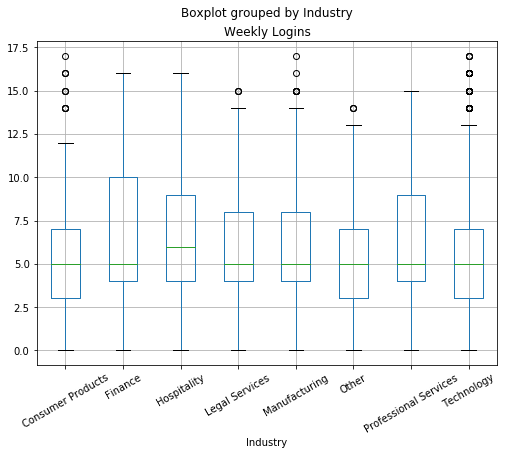

In [36]:
df.boxplot('Weekly Logins','Industry',rot = 30,figsize=(8,6));

At this point I see that I don't need tho change the data types. It's worth noting that all eight options spawn to zero weekly logins, so probably there is no relationship between Industry and Engagement. From the diagram, I observe that maybe people in Finance and Hospitality industries login to the site more often than, but I cannot really be sure that there is a strong correlation. 

I would like to get a specific numerical result that its easy to compare once I check each column, so I made a little research and find researchpy library.

In [10]:
import researchpy as rp

In [11]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Industry'])) 

,N,Mean,SD,SE,95% Conf.,Interval
Industry,,,,,,
Consumer Products,99,6.1414,4.0305,0.4051,5.3375,6.9453
Finance,137,6.5328,3.9090,0.3340,5.8724,7.1933
Hospitality,147,6.5170,3.8506,0.3176,5.8893,7.1447
Legal Services,98,6.2755,3.7466,0.3785,5.5244,7.0266
Manufacturing,233,5.9142,3.8046,0.2493,5.4231,6.4052
Other,67,5.6716,3.5351,0.4319,4.8094,6.5339
Professional Services,42,6.5238,3.6642,0.5654,5.3820,7.6656
Technology,895,5.9363,3.8691,0.1293,5.6825,6.1901


I realize that the mean and the 95% confidence interval strongly validate my findings about Finance and Hospitality being the most related to Logins, along with Professional Services, that I didn't notice at first. With this proof I decide to use the mean and the confidence interval to compare options in each field. If in a fied, one category has an outstanding high mean and confidence interval, it most probably be related to engagement.

#### Data

So lets get the summary for each category against Weekly Logins, and then compare.

In [13]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Slack Integration'])) 

,N,Mean,SD,SE,95% Conf.,Interval
Slack Integration,,,,,,
No,1270,4.6945,2.9652,0.0832,4.5313,4.8577
Yes,448,9.9531,3.3784,0.1596,9.6394,10.2668


In [14]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Most Used Page'])) 

,N,Mean,SD,SE,95% Conf.,Interval
Most Used Page,,,,,,
/dashboard,61,4.1803,4.0104,0.5135,3.1532,5.2074
/home,68,3.6618,3.5180,0.4266,2.8102,4.5133
/login,64,3.6562,3.4329,0.4291,2.7987,4.5138
/tool/build_query,62,4.0806,3.5450,0.4502,3.1804,4.9809
/tool/search,67,4.4328,4.0273,0.4920,3.4505,5.4152
/tool/storyboard,1396,6.5423,3.7217,0.0996,6.3469,6.7377


In [15]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Had Free Trial'])) 

,N,Mean,SD,SE,95% Conf.,Interval
Had Free Trial,,,,,,
No,1103,3.8685,1.7263,0.0520,3.7666,3.9705
Yes,615,10.0065,3.4381,0.1386,9.7342,10.2788


In [16]:
rp.summary_cont(df['Weekly Logins'].groupby(df['User MRR'])) 

,N,Mean,SD,SE,95% Conf.,Interval
User MRR,,,,,,
39,922,6.1020,3.8777,0.1277,5.8513,6.3526
169,624,6.0577,3.8670,0.1548,5.7537,6.3617
1299,172,5.9012,3.6252,0.2764,5.3555,6.4468


In [17]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Company Name'])) 

,N,Mean,SD,SE,95% Conf.,Interval
Company Name,,,,,,
HP,69,5.9855,4.0420,0.4866,5.0145,6.9565
Huron Consulting Group,42,6.5238,3.6642,0.5654,5.3820,7.6656
Hushmail,83,5.9157,3.9361,0.4320,5.0562,6.7751
InVision,51,6.3529,3.5879,0.5024,5.3438,7.3621
LiveRamp,69,5.9855,3.3933,0.4085,5.1703,6.8007
Lucky Brand,73,6.1370,4.1510,0.4858,5.1685,7.1055
Lush,26,6.1538,3.7491,0.7352,4.6396,7.6681
One Legal,25,8.0000,3.5000,0.7000,6.5553,9.4447
Siemon,118,6.3051,4.1541,0.3824,5.5477,7.0624


In [18]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Company Size'])) 

,N,Mean,SD,SE,95% Conf.,Interval
Company Size,,,,,,
$100M - $500M,798,6.0238,3.7877,0.1341,5.7606,6.2870
$1B - $10B,158,6.2975,4.2793,0.3404,5.6250,6.9699
$500M - $1B,122,6.4016,4.0014,0.3623,5.6844,7.1188
<$100M,360,6.3083,3.8113,0.2009,5.9133,6.7034
>$10B,280,5.5964,3.7144,0.2220,5.1595,6.0334


In [19]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Territory'])) 

,N,Mean,SD,SE,95% Conf.,Interval
Territory,,,,,,
East,381,6.4304,3.7897,0.1942,6.0487,6.8122
Midwest,520,6.0212,3.7685,0.1653,5.6965,6.3458
West,817,5.9241,3.9172,0.1370,5.6551,6.1931


In [20]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Sales Call in Trial']))

,N,Mean,SD,SE,95% Conf.,Interval
Sales Call in Trial,,,,,,
No,1049,5.9876,3.7922,0.1171,5.7579,6.2174
Yes,669,6.1883,3.9325,0.1520,5.8898,6.4869


In [21]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Zendesk Integration']))

,N,Mean,SD,SE,95% Conf.,Interval
Zendesk Integration,,,,,,
No,797,5.9598,3.849,0.1363,5.6922,6.2275
Yes,921,6.1574,3.846,0.1267,5.9087,6.4061


In [22]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Salesforce Integration']))

,N,Mean,SD,SE,95% Conf.,Interval
Salesforce Integration,,,,,,
No,1005,6.0199,3.8347,0.1210,5.7825,6.2573
Yes,713,6.1304,3.8673,0.1448,5.8461,6.4148


In [23]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Gmail Integration']))

,N,Mean,SD,SE,95% Conf.,Interval
Gmail Integration,,,,,,
No,776,6.1675,3.9172,0.1406,5.8915,6.4436
Yes,942,5.9820,3.7892,0.1235,5.7397,6.2242


In [24]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Most common referrer']))

,N,Mean,SD,SE,95% Conf.,Interval
Most common referrer,,,,,,
/facebook.com,212,5.9670,3.7598,0.2582,5.4579,6.4760
/google.com,215,6.3256,3.7449,0.2554,5.8222,6.8290
/mail.google.com,222,6.3423,4.0917,0.2746,5.8011,6.8835
/quora,218,5.8440,3.6574,0.2477,5.3558,6.3323
/slack.com,221,6.1131,3.7088,0.2495,5.6214,6.6048
/tripadvisor.com,214,5.9766,3.9640,0.2710,5.4425,6.5108
hotels.com,212,6.1462,3.9574,0.2718,5.6104,6.6820
zoom.com,204,5.7892,3.9015,0.2732,5.2506,6.3278


In [25]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Most common IP']))

,N,Mean,SD,SE,95% Conf.,Interval
Most common IP,,,,,,
102.129.249.120,77,6.1039,3.7226,0.4242,5.2590,6.9488
134.209.44.228,88,6.1364,3.8839,0.4140,5.3134,6.9593
138.197.222.35,83,6.6145,4.3049,0.4725,5.6744,7.5545
138.68.240.218,96,5.9375,3.9492,0.4031,5.1373,6.7377
138.68.41.90,96,6.1562,4.0323,0.4115,5.3392,6.9733
142.93.8.33,85,5.8941,3.4813,0.3776,5.1432,6.6450
159.203.166.41,84,6.4405,4.4461,0.4851,5.4756,7.4053
162.243.107.120,76,5.6974,3.7239,0.4272,4.8464,6.5483
162.243.108.129,85,5.7765,3.6560,0.3965,4.9879,6.5650


In [26]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Sales Touches to Close']))

,N,Mean,SD,SE,95% Conf.,Interval
Sales Touches to Close,,,,,,
4,127,6.3780,3.9540,0.3509,5.6836,7.0723
5,130,5.7769,3.7526,0.3291,5.1258,6.4281
6,139,6.0576,4.0696,0.3452,5.3750,6.7401
7,155,6.4516,3.9628,0.3183,5.8228,7.0804
8,124,6.0242,3.9642,0.3560,5.3195,6.7289
9,132,5.7879,3.5619,0.3100,5.1746,6.4012
10,134,5.6269,3.7630,0.3251,4.9839,6.2699
11,124,6.1532,3.8552,0.3462,5.4679,6.8385
12,138,5.8043,3.4171,0.2909,5.2291,6.3796


In [27]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Used Admin Panel']))

,N,Mean,SD,SE,95% Conf.,Interval
Used Admin Panel,,,,,,
No,991,6.0595,3.8984,0.1238,5.8165,6.3025
Yes,727,6.0743,3.7797,0.1402,5.7991,6.3495


In [28]:
rp.summary_cont(df['Weekly Logins'].groupby(df['Has Issued Support Request']))

,N,Mean,SD,SE,95% Conf.,Interval
Has Issued Support Request,,,,,,
No,787,5.9263,3.8376,0.1368,5.6578,6.1948
Yes,931,6.1837,3.8540,0.1263,5.9358,6.4316


***


***

#### Data revision

The categories 'Slack Integration' and 'Had Free Trial' are the ones that clearly show a relation with 'Weekly Logins'. the first time i made the analysis I thought that maybe fields with two categories well not suited for the ANOVA analysis, but after running the check on other binomial categories like Zendesk Integration, I stopped worrying.

Still, the field 'Sales Touches to Close' was not categorical data, so I checked for a pearson co-relation index.

In [32]:
df['Sales Touches to Close'].corr(df['Weekly Logins'])

0.0019999686175300574

So no co-relation. To check my conclusions from the ANOVA analysis, I plotted both 'Slack Integration' and 'Had Free Trial' against 'Weekly Logins'.

C:\Users\Luis\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Luis\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


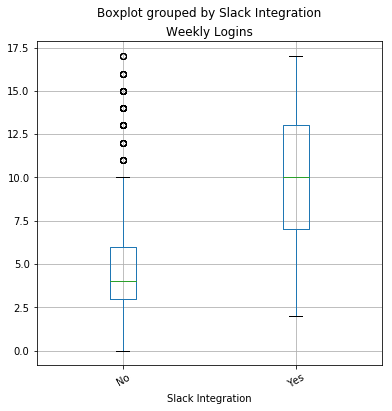

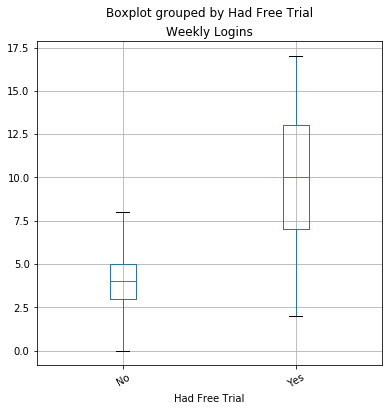

In [33]:
df.boxplot('Weekly Logins','Slack Integration',rot = 30,figsize=(6,6))
df.boxplot('Weekly Logins','Had Free Trial',rot = 30,figsize=(6,6))

The graphs clearly show that users that had Free Trial logged in an average of 10 times a week (higher that the average 6 logins), and even the users who logged in the less used the site at least twice a week. Something very similiar happens with 'Slack Integration', even though there are still some people outside the normal distribution that didn't get Slack integration and still logged in very often.

The similiarity between both graphs makes me think that maybe one variable depends on the other. Meaning that maybe users who got the Slack Integration also got Free Trial, or vice versa. For this, to be honest, I just checked my Excel file from earlier, as I did not want to research more python code and libraries. I ordered the whole table by 'Had Free Trial'. After replacing yes and no values with 1 and 0, I found out a strong correlation between both fields.

### Conclusions

Most of the users that had a high engagement with the site also got Slack Integration and Free Trial options. Even though correlation does not equal causation, it seems logical that people that are using their free trial period log in more often. For further analysis, info regarding users that finnished their free trials and their weekly logins would be requiered.

About the relationship between Slack Integration and Free Trial, I imagine that maybe a collaboration between Slack and this site resulted in offering free trials to their users, which would explain the correlation.
